In [1]:
###import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
###import csv


df = pd.read_csv('/Users/chrisellis/Desktop/CSVs/Colorado Marijuana Tax Revenue 14-22.csv')


###inspect df
df.head()

,Colorado Department of Revenue,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Marijuana Tax and Fee Revenue Report ¹,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,February 2014 to Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Revenue Month,Revenue Year,State Sales Tax 2.9%,NaN,NaN,Retail Marijuana Sales Tax (RMS),NaN,NaN,NaN,NaN,NaN,Retail Marijuana Excise Tax (RME) 15%,NaN,NaN,License & Fees Total,Total Taxes & Fees
4,NaN,NaN,State Sales Tax Total,Medical Marijuana,"Retail Marijuana ², ³",RMS Tax Total ⁴,RMS Local Government Distribution,RMS Retained by State Total,RMS Marijuana Tax Cash Fund,RMS Public School Fund,RMS General Fund,RME Tax Total ⁴,RME Public School Capital Construction Assista...,RME Public School Fund,NaN,NaN


In [3]:
###data tidying

df.rename(columns = {
    'Colorado Department of Revenue': 'revenue_month',
    'Unnamed: 1': 'revenue_year',
    'Unnamed: 2': 'state_sales_tax_total',
    'Unnamed: 3': 'med_marijuana',
    'Unnamed: 4': 'retail_marijuana',
    'Unnamed: 5': 'rms_total',
    'Unnamed: 6': 'rms_distribution',
    'Unnamed: 7': 'rms_state_total',
    'Unnamed: 8': 'rms_cashfund',
    'Unnamed: 9': 'rms_schoolfund',
    'Unnamed: 10': 'rms_generalfund',
    'Unnamed: 11': 'rme_total',
    'Unnamed: 12': 'rme_construction_fund',
    'Unnamed: 13': 'rme_schoolfund',
    'Unnamed: 14': 'license_fees_total',
    'Unnamed: 15': 'overall_total',
},inplace=True)


df.drop([0,1,2,3,4,5], inplace=True)

In [4]:
###reset the index


df = df.reset_index(drop=True)
df.head()

,revenue_month,revenue_year,state_sales_tax_total,med_marijuana,retail_marijuana,rms_total,rms_distribution,rms_state_total,rms_cashfund,rms_schoolfund,rms_generalfund,rme_total,rme_construction_fund,rme_schoolfund,license_fees_total,overall_total
0,1,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2014,"$1,330,209","$913,519","$416,690","$1,401,568","$210,269","$1,191,534",NaN,NaN,NaN,"$195,318","$195,286",$0,"$592,661","$3,519,755"
2,3,2014,"$1,460,429","$1,022,176","$438,253","$1,434,916","$212,674","$1,210,786",NaN,NaN,NaN,"$339,615","$339,531",$0,"$857,615","$4,092,575"
3,4,2014,"$1,569,405","$999,900","$569,505","$1,898,685","$285,215","$1,613,861",NaN,NaN,NaN,"$609,907","$609,887",$0,"$902,995","$4,980,992"
4,5,2014,"$1,559,710","$919,982","$639,728","$2,217,607","$330,057","$1,864,829",NaN,NaN,NaN,"$734,351","$732,406",$0,"$761,687","$5,273,355"


In [5]:
### lookinf for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   revenue_month          108 non-null    object
 1   revenue_year           101 non-null    object
 2   state_sales_tax_total  100 non-null    object
 3   med_marijuana          100 non-null    object
 4   retail_marijuana       100 non-null    object
 5   rms_total              100 non-null    object
 6   rms_distribution       100 non-null    object
 7   rms_state_total        100 non-null    object
 8   rms_cashfund           58 non-null     object
 9   rms_schoolfund         58 non-null     object
 10  rms_generalfund        58 non-null     object
 11  rme_total              100 non-null    object
 12  rme_construction_fund  100 non-null    object
 13  rme_schoolfund         100 non-null    object
 14  license_fees_total     100 non-null    object
 15  overall_total          

In [6]:
### locating the last relevant row of the dataset: from here I'll drop the remaining rows


df[(df.revenue_month == '5') & (df.revenue_year == '2022')]

,revenue_month,revenue_year,state_sales_tax_total,med_marijuana,retail_marijuana,rms_total,rms_distribution,rms_state_total,rms_cashfund,rms_schoolfund,rms_generalfund,rme_total,rme_construction_fund,rme_schoolfund,license_fees_total,overall_total
100,5,2022,"$766,534","$623,561","$142,974","$19,502,031","$1,957,923","$17,621,348","$12,660,938","$2,218,528","$2,741,882","$6,228,500","$6,144,363",$0,"$1,023,385","$27,520,451"


In [7]:
df.drop(range(101,110), inplace=True)

In [9]:
###  Reinspection

In [10]:
### All null values are accounted for:
### Retail marijuana stores began selling on 1/1/2014, but data wasn't being collected until 2/1/14
### RMS (Retail Marijuana Sales Tax) increased from 10% to 15% in July, 2017.  The increase in reflected in 8/2017 values.
### It's unclear if RMS wasn't being distributed across the RMS funds until 8/2017, or they weren't being reported until then.

In [8]:
### Change datatypes - all but 2 columns need to be converted to ints
### To do that we need to convert all NaNs to 0

df = df.fillna(0)
df.head()

,revenue_month,revenue_year,state_sales_tax_total,med_marijuana,retail_marijuana,rms_total,rms_distribution,rms_state_total,rms_cashfund,rms_schoolfund,rms_generalfund,rme_total,rme_construction_fund,rme_schoolfund,license_fees_total,overall_total
0,1,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2014,"$1,330,209","$913,519","$416,690","$1,401,568","$210,269","$1,191,534",0,0,0,"$195,318","$195,286",$0,"$592,661","$3,519,755"
2,3,2014,"$1,460,429","$1,022,176","$438,253","$1,434,916","$212,674","$1,210,786",0,0,0,"$339,615","$339,531",$0,"$857,615","$4,092,575"
3,4,2014,"$1,569,405","$999,900","$569,505","$1,898,685","$285,215","$1,613,861",0,0,0,"$609,907","$609,887",$0,"$902,995","$4,980,992"
4,5,2014,"$1,559,710","$919,982","$639,728","$2,217,607","$330,057","$1,864,829",0,0,0,"$734,351","$732,406",$0,"$761,687","$5,273,355"


In [9]:
### this took some trial and error fwiw.  this was the only way I was able to replace the '$' and ',' string value
### conflicting info online if replace method parameter 'regex' is default True or False

df.replace(['\$', '\,'], '', inplace=True, regex=True)

df.head()

,revenue_month,revenue_year,state_sales_tax_total,med_marijuana,retail_marijuana,rms_total,rms_distribution,rms_state_total,rms_cashfund,rms_schoolfund,rms_generalfund,rme_total,rme_construction_fund,rme_schoolfund,license_fees_total,overall_total
0,1,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2014,1330209,913519,416690,1401568,210269,1191534,0,0,0,195318,195286,0,592661,3519755
2,3,2014,1460429,1022176,438253,1434916,212674,1210786,0,0,0,339615,339531,0,857615,4092575
3,4,2014,1569405,999900,569505,1898685,285215,1613861,0,0,0,609907,609887,0,902995,4980992
4,5,2014,1559710,919982,639728,2217607,330057,1864829,0,0,0,734351,732406,0,761687,5273355


In [10]:
### converting relevant column datatypes to integers
### was thrown an error regarding a single string value in 'retail_marijuana', need to convert value to int before continuing
### commented out to check if other columns were converted successfully

df.state_sales_tax_total = df.state_sales_tax_total.astype(int)
df.med_marijuana = df.med_marijuana.astype(int)
#df.retail_marijuana = df.retail_marijuana.astype(int)
df.rms_total = df.rms_total.astype(int)
df.rms_distribution = df.rms_distribution.astype(int)
df.rms_state_total = df.rms_state_total.astype(int)
df.rms_cashfund = df.rms_cashfund.astype(int)
df.rms_schoolfund = df.rms_schoolfund.astype(int)
df.rms_generalfund = df.rms_generalfund.astype(int)
df.rme_total = df.rme_total.astype(int)
df.rme_construction_fund = df.rme_construction_fund.astype(int)
df.rme_schoolfund = df.rme_schoolfund.astype(int)
df.license_fees_total = df.license_fees_total.astype(int)
df.overall_total = df.overall_total.astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   revenue_month          101 non-null    object
 1   revenue_year           101 non-null    object
 2   state_sales_tax_total  101 non-null    int64 
 3   med_marijuana          101 non-null    int64 
 4   retail_marijuana       101 non-null    object
 5   rms_total              101 non-null    int64 
 6   rms_distribution       101 non-null    int64 
 7   rms_state_total        101 non-null    int64 
 8   rms_cashfund           101 non-null    int64 
 9   rms_schoolfund         101 non-null    int64 
 10  rms_generalfund        101 non-null    int64 
 11  rme_total              101 non-null    int64 
 12  rme_construction_fund  101 non-null    int64 
 13  rme_schoolfund         101 non-null    int64 
 14  license_fees_total     101 non-null    int64 
 15  overall_total          

In [11]:
### locate the string to make sure value is what I expected

df[df.retail_marijuana == '(3432)']

,revenue_month,revenue_year,state_sales_tax_total,med_marijuana,retail_marijuana,rms_total,rms_distribution,rms_state_total,rms_cashfund,rms_schoolfund,rms_generalfund,rme_total,rme_construction_fund,rme_schoolfund,license_fees_total,overall_total
45,10,2017,999826,1003258,(3432),15125886,1516847,13634493,9796383,3838110,0,5997375,5999951,0,975320,23098408


In [12]:
### I was thrown a few more errors for random strings in 'retai_marijuana'
### I'm sure there's an easier way to replace the strings with correct value, I just couldn't find it

df.retail_marijuana.replace(['\(3432\)', '\(162036\)', '\(5857\)', '\(2047\)'], [3432, 162036, 5857, 2047], regex=True, inplace=True)


In [13]:
### with all random string values converted, time to convert 'retail_marijuana' to int and then reinspect the data.

df.retail_marijuana = df.retail_marijuana.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   revenue_month          101 non-null    object
 1   revenue_year           101 non-null    object
 2   state_sales_tax_total  101 non-null    int64 
 3   med_marijuana          101 non-null    int64 
 4   retail_marijuana       101 non-null    int64 
 5   rms_total              101 non-null    int64 
 6   rms_distribution       101 non-null    int64 
 7   rms_state_total        101 non-null    int64 
 8   rms_cashfund           101 non-null    int64 
 9   rms_schoolfund         101 non-null    int64 
 10  rms_generalfund        101 non-null    int64 
 11  rme_total              101 non-null    int64 
 12  rme_construction_fund  101 non-null    int64 
 13  rme_schoolfund         101 non-null    int64 
 14  license_fees_total     101 non-null    int64 
 15  overall_total          

In [14]:
yearly_totals = df.overall_total.groupby(df.revenue_year).sum()
totals_list = yearly_totals.tolist()
print(totals_list)

[67594324, 130411174, 193604811, 247368474, 266529637, 302458427, 387480111, 423486053, 144542819]


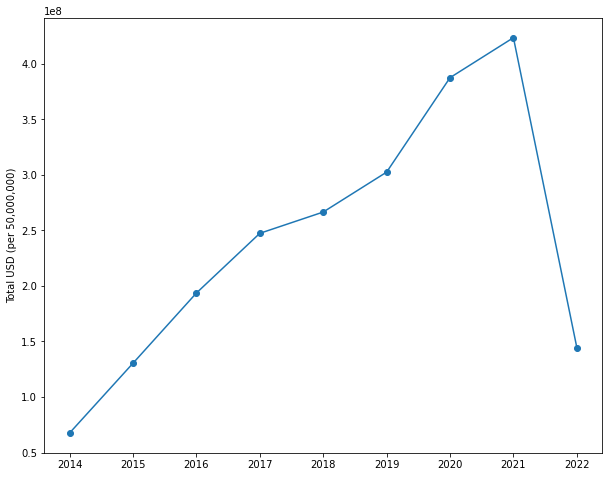

In [15]:
### steady growth overall, including a large jump between 2019 and 2020, which coincides with COVID.
### lets vizualize the totals to get a better sense of growth per year

yearly_dict = yearly_totals.to_dict()
total_2014 = yearly_totals['2014']
total_2015 = yearly_totals['2015']
total_2016 = yearly_totals['2016']
total_2017 = yearly_totals['2017']
total_2018 = yearly_totals['2018']
total_2019 = yearly_totals['2019']
total_2020 = yearly_totals['2020']
total_2021 = yearly_totals['2021']

years = list(yearly_dict.keys())


fig, ax = plt.subplots(figsize=(10,8))
ax.plot(years, totals_list, marker='o')
ax.set_ylabel('Total USD (per 50,000,000)')



plt.show()
plt.close()


In [ ]:
### linear growth from 2014 to 2017.  starts to slow down between 2017 and 2019, though still positive growth
### rev increases exponentially from 2019 to 2020, need more research.  Begins to taper off in 2021

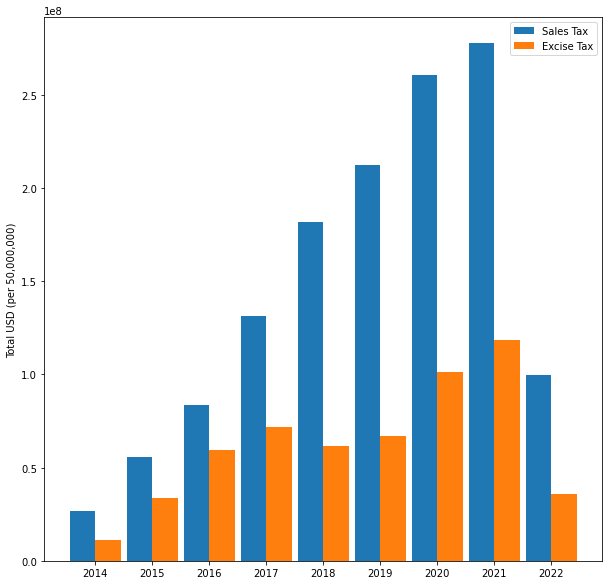

In [16]:
### Sales Tax and Excise Tax totals per year, compared

rms_yearly = df.rms_total.groupby(df.revenue_year).sum()
rms_list = rms_yearly.tolist()
rme_yearly = df.rme_total.groupby(df.revenue_year).sum()
rme_list = rme_yearly.tolist()

x = np.arange(len(years))
width = .45

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x - width/2, rms_list, width, label='Sales Tax')
ax.bar(x + width/2, rme_list, width, label = 'Excise Tax')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_ylabel('Total USD (per 50,000,000)')
ax.legend()

plt.show()
plt.close()


In [ ]:
### Sales Tax and Excise Tax gap starts to grow larger in 2017, and only widens over the next few years

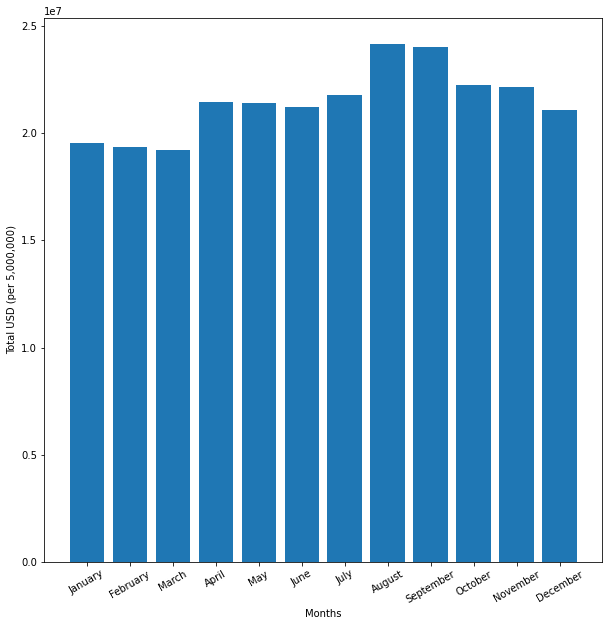

In [68]:
jan_avg = df.overall_total[df.revenue_month == '1'].mean()
feb_avg = df.overall_total[df.revenue_month == '2'].mean()
march_avg = df.overall_total[df.revenue_month == '3'].mean()
april_avg = df.overall_total[df.revenue_month == '4'].mean()
may_avg = df.overall_total[df.revenue_month == '5'].mean()
june_avg = df.overall_total[df.revenue_month == '6'].mean()
july_avg = df.overall_total[df.revenue_month == '7'].mean()
aug_avg = df.overall_total[df.revenue_month == '8'].mean()
sept_avg = df.overall_total[df.revenue_month == '9'].mean()
oct_avg = df.overall_total[df.revenue_month == '10'].mean()
nov_avg = df.overall_total[df.revenue_month == '11'].mean()
dec_avg = df.overall_total[df.revenue_month == '12'].mean()


avgs_list = [jan_avg, feb_avg, march_avg, april_avg, may_avg, june_avg, july_avg, aug_avg, sept_avg, oct_avg, nov_avg, dec_avg]

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


fig, ax = plt.subplots(figsize=(10,10))
ax.bar(range(1,13), avgs_list)
ax.set_xticks(range(1,13))
ax.set_xticklabels(months, rotation=30)
ax.set_xlabel('Months')
ax.set_ylabel('Total USD (per 5,000,000)')

plt.show()
plt.close()



In [ ]:
### January is slightly skewed due to no revenue reported in Jan, 2014.

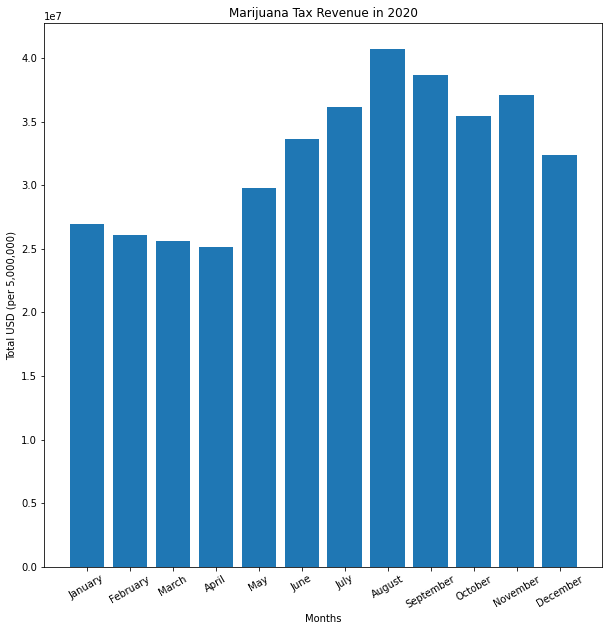

In [72]:
revenue_2020 = df.overall_total[df.revenue_year == '2020']

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(range(1,13), revenue_2020)
ax.set_xticks(range(1,13))
ax.set_xticklabels(months, rotation=30)
ax.set_xlabel('Months')
ax.set_ylabel('Total USD (per 5,000,000)')
plt.title('Marijuana Tax Revenue in 2020 by Month')


plt.show()
plt.close()

In [ ]:
### Some more (possibly related?) info:
### Colorado issued official stay at home order on March 25, 2020, though majority of people were working from home/laid off a few weeks prior
### Federal Stimulus checks of $1200 issued mid April 2020, most were recieved within 30 days
### Stay at Home order officially lifted April 26, 2020, though strict regualtions still in place
### Public gatherings of 10 or fewer allowed starting June 1, 2020


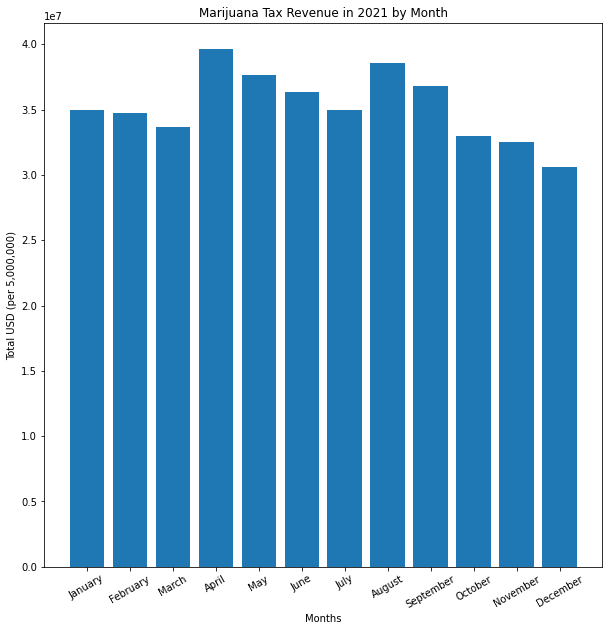

In [73]:
revenue_2021 = df.overall_total[df.revenue_year == '2021']

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(range(1,13), revenue_2021)
ax.set_xticks(range(1,13))
ax.set_xticklabels(months, rotation=30)
ax.set_xlabel('Months')
ax.set_ylabel('Total USD (per 5,000,000)')
plt.title('Marijuana Tax Revenue in 2021 by Month')

plt.show()
plt.close()

In [ ]:
### April is, on average, middle of the pack in terms of tax revenue, and was the worst month in 2020.  In 2021, however, it was the highest in total rev.
### 2 more federal stimulus checks went out in 2021 - One at the beginning of the year, and one in march 2020.

Conclusions:

 - Tax revenue has grown every year from 2014 to 2021
 - While sales tax revenue has continued to rise, excise tax revenue actually stagnated for a few years before increasing in 2020 and 2021.
 - Sales growth in 2020 didn't follow overall growth trends.  Federal stimulus checks combined with stay at home orders could be correlated to increased revenue.
 - 2022, based on current data and past trends, is on track to be the first year to have decreased overall revenue from the previous year.  Could suggest that 2020 and 2021 are outliers due to extenuating circumstances.
